# Gradient Descent

How DL models learn:

1. Guess a solution
2. Compute error (difference between actual and guess)
3. Learn from mistakes and modify parameters.

We have parameters/ weights $W$, and an error/loss function that is formed using $W$ in it as $J(W)$.

It implies that the error/loss in the model totally depend on weights/parameters of the model.

Goal of gradient descent is to find the smallest possible value, i.e. minimum of the error function $J(W)$ (implying fewest mistakes as possible). This is done using derivatives.

**Gradient descent is an algorithm.**

Gradient <==> derivative. Descent is to go down the curve formed with $W\  vs\  J(W)$ i.e., go down the curve to find minimum $J(W)$ value.

**Value of the function $J$ is minimized by finding a point where its derivative is 0.**

Gradient descent algorithm:

1. Guess a minimum randomly. (By initialising random weights $W$)
2. Loop over number of training iterations:
    1. Compute derivative at the guessed minimum. (find  $dJ/dW$ value at $W$)
    2. New guess ($W'$) = Current guess ($W$) - [the derivative ($dJ/dW$ at $W$)] * learning rate.
       **Subtracting the derivative** - This is done because if the current guess has a negative derivative (meaning that the minimum is more towards the right of the negative slope), it moves the current guess towards a positive side (right side) towards the minimum by "adding the derivative".  
       And if the current guess has a positive derivative (implying that the minimum is before/left side the positive slope), it moves the current guess to the left side towards the minimum by "subtracting the derivative".

Gradient Descent is not always guarenteed to give optimal solutions

### Problems with Gradient descent

It is not guaranteed to find a correct solution, or even the best solution.

It can go wrong if the parameters are not set right for a particular error function.

Error landscapes are impossible to visualize in > 2D.

Saddle point - A point in the landscape where we have a local minimum using one parameter(direction) and a local maximum using other parameter(direction). Gradient Descent will get trapped in a local minimum only if that point is a local minimum in all directions. These kinds of points are very few in the landscape in a high dimensional space.

Possible solutions:

Re-train the model using different random weights as start points, and choose a model which performs best (where the weights after random starts and GD are giving minimum error).

Increase the complexity or dimensionality of the model to get fewer local minima.

## Gradient Descent in 1D

Written in Jupyter notebook


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import sympy as sym
display.set_matplotlib_formats('svg')

/tmp/ipykernel_5417/2866649856.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


We use the following function:
$$ f(x) = 3x^2 - 3x + 4$$
It's derivative will be:
$$ \frac{df}{dx} = 6x-3$$

In [3]:
# define a function and its derivative

def fn(x):
    return 3*x**2 - 3*x + 4

def derv(x):
    return 6*x - 3

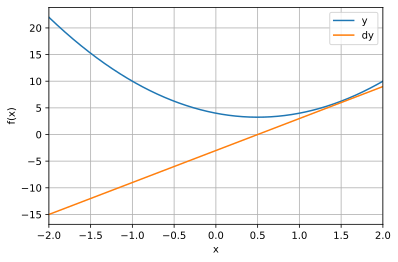

In [4]:
# plotting the function and its derivative

x = np.linspace(-2,2,2001)
plt.plot(x,fn(x),x,derv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

## Gradient descent algorithm

In [5]:
# selecting 1 random starting point

localmin = np.random.choice(x,1) 
print("start point", localmin)

lr = 0.01 # learning rate
n = 100 # number of epochs

for i in range(n):
    grad = derv(localmin) # gradient is derivative of one x
    localmin -= grad*lr # new local minimum will keep shifting according to gradient
    
localmin

start point [-1.714]


array([0.49545051])

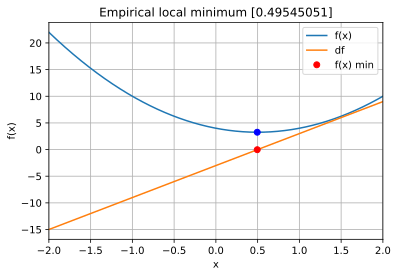

In [6]:
# plotting results
plt.plot(x,fn(x),x,derv(x))
plt.plot(localmin, derv(localmin), 'ro')
plt.plot(localmin, fn(localmin), 'bo')
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df', 'f(x) min'])
plt.title("Empirical local minimum {}".format(localmin))
plt.show()

**Running the below code with different values of learnning rate and epochs will give different results.**  
- If learning rate is too low, we will not reach the required goal within the given number of epochs.
- If number of epochs is too high, the convergence happens way earlier and will not change further, resulting in time inefficiency.

start point [-1.996]


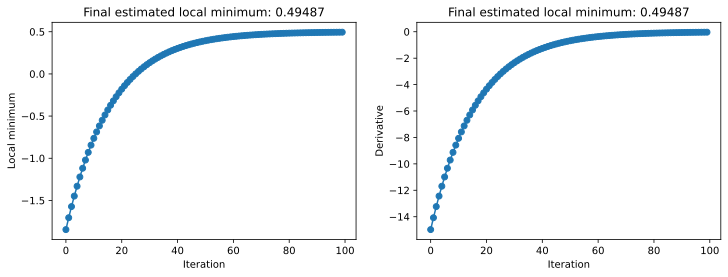

In [7]:
# storing the results in a list/array

# selecting 1 random starting point
localmin = np.random.choice(x,1) 
print("start point", localmin)

lr = .01 # learning rate
n = 100 # number of epochs

modelParam = np.zeros((n,2)) # n rows for each epoch, 2 columns matrix
for i in range(n):
    grad = derv(localmin) # gradient is derivative of one x
    localmin -= grad*lr # new local minimum will keep shifting according to gradient
    modelParam[i,:] = localmin[0], grad[0] # storing local min, and gradient of each local min for each epoch

fig, ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
    ax[i].plot(modelParam[:,i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated local minimum: {localmin[0]:0.5f}')
    
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()                    

# Gradient Descent in 2D

Gradient descent in 2D is same as that in 1D.

In 2D, there is a derivative for each dimension in the axes.

So, gradient of a function in 2D is a collection (list/vector/array) of partial derivatives along each axis.

Partial derivative for a function $f(x,y)$ is given as:
$$\frac{\partial f}{\partial x} = \partial_x f = f_x(x,y)$$
Here, regular derivative is calculated by treating y as constant. $\partial f / \partial y$ is also calculated in the same way.

Gradient is given as $ \nabla = (\partial_x f, \partial_y f, \cdots , \partial_z f)$

The function to be working on is follows:
$$ f(x,y) = 3(1-x)^2 e^{-x^2-(y+1)^2} - 10(\frac{x}{5} - x^3 - y^5)e^{-x^2-y^2} - \frac{1}{3}e^{-(x+1)^2 - y^2}$$

In [8]:
# define the function
def peaks(x,y):
    
    x,y = np.meshgrid(x,y)
    
    z = 3*((1-x)**2)*np.exp(-(x**2)-(y+1)**2) \
        - 10*((x/5) - x**3 - y**5)*np.exp(-x**2 - y**2) \
        - (1/3)*(np.exp(-(x+1)**2 - y**2))
        
    return z
    

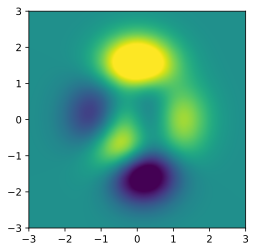

In [9]:
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

plt.imshow(Z, extent = [x[0],x[-1],y[0],y[-1]], vmin = -5, vmax = 5, origin='lower')
plt.show()

In [10]:
# Creating Partial Derivatives

sx, sy = sym.symbols('sx,sy')

sz = 3*((1-sx)**2)*sym.exp(-(sx**2)-(sy+1)**2) \
        - 10*((sx/5) - sx**3 - sy**5)*sym.exp(-sx**2 - sy**2) \
        - (1/3)*(sym.exp(-(sx+1)**2 - sy**2))

# creating functions
df_x = sym.lambdify((sx,sy), sym.diff(sz,sx), 'sympy')
df_y = sym.lambdify((sx,sy), sym.diff(sz,sy), 'sympy')

df_x(1,1).evalf() # computing partial derivative w.r.t x at (1,1) point

-1.07369833656079

In [11]:
localmin = np.random.rand(2)*4-2 # creating two random points x,y between -2 to +2 
start = localmin[:] # making a copy


lr = 0.01 # learning rate
n = 1000 # number of epochs

trajectory = np.zeros((n,2)) # trajectory of size training epochs*2
for i in range(n):
    grad = np.array([df_x(localmin[0],localmin[1]).evalf(), df_y(localmin[0],localmin[1]).evalf() ]) # gradient is derivative of one x
    localmin = localmin - grad*lr # new local minimum will keep shifting according to gradient
    trajectory[i,:] = localmin
    
print(localmin, start)

[3.24811524052488 -1.01596782883810] [ 1.9481045  -0.51604434]


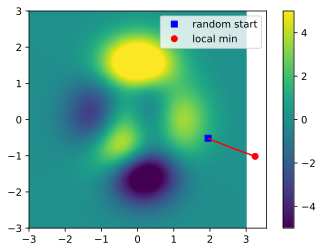

In [12]:
plt.imshow(Z, extent = [x[0],x[-1],y[0],y[-1]], vmin = -5, vmax = 5, origin='lower')
plt.plot(start[0],start[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['random start', 'local min'])
plt.colorbar()
plt.show()

## Parametric experiments on Gradient Descent:

Using Gradient Descent in 1D, we conduct 2 experiments:

#### A one variable experiment with varying two parameters - each one at a time:
    - Learning rate
    - Initial value

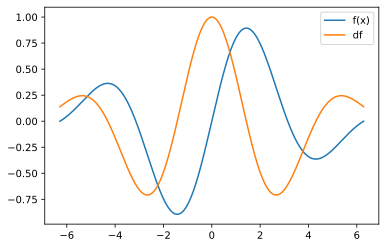

In [13]:
x = np.linspace(-2*np.pi, 2*np.pi, 401) # 401 values of x between -2pi to 2pi

def fn(x):
    return (np.sin(x)*np.exp(-x**2*.05))

def derv(x):
    return (np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05))



plt.plot(x,fn(x),x,derv(x))
plt.legend(['f(x)','df'])
plt.show()

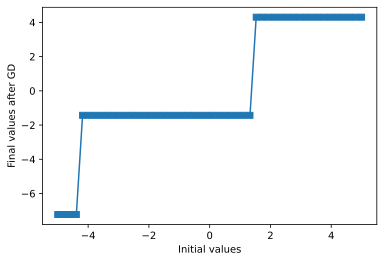

In [14]:
# Experiment 1 : Systematically varying the starting locations

start = np.linspace(-5,5,50) # random 50 initial values between -5 to 5
final = np.zeros(len(start)) # to store final local minima after gradient descent

lr = 0.1 # learning rate
n = 1000 # training epochs

for i,localmin in enumerate(start):
    
    #gradient descent algo for each initial localmin in the start array
    for j in range(n):
        grad = derv(localmin)
        localmin -= grad*lr 
    
    final[i] = localmin #storing final localmin after 1000 epochs

plt.plot(start,final,'s-')
plt.xlabel("Initial values")
plt.ylabel("Final values after GD")
plt.show()

Above graph shows us that the final local minima after 1000 epochs are almost similar for a range of initial values

The graph above from experiment 1 says that when we start in x-axis at a point < -4, we end up at a local min of somewhere near -6, and if started at  > -4, we end up at local min near -2 (see graph below) which is also the case  if we start from somewhere between -2 to near +2. If we start at 2, then we end up at local min near 4

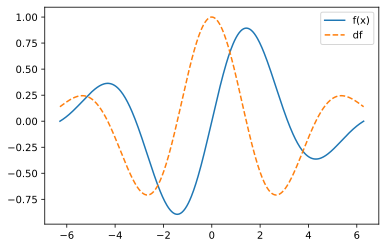

In [15]:
plt.plot(x,fn(x))
plt.plot(x,derv(x), '--')
plt.legend(['f(x)','df'])
plt.show()

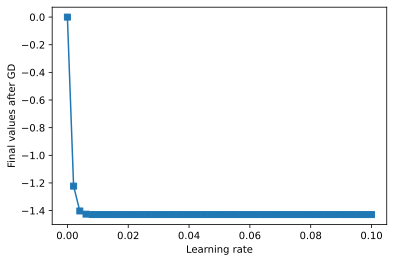

In [16]:
# Experiment 2 : Systematically vary learning rate

lr = np.linspace(1e-10,1e-1,50) # 50 small values of learning rates
finalres = np.zeros(len(lr))
n = 1000 # number of epochs

for i, rate in enumerate(lr):
    
    localmin = 0 #let's say initial point is always at 0
    
    for j in range(n):
        grad = derv(localmin)
        localmin = localmin - grad*rate #multiply with each learning rate for 1000 epochs
    
    finalres[i] = localmin

plt.plot(lr,finalres,'s-')
plt.xlabel("Learning rate")
plt.ylabel("Final values after GD")
plt.show()

#### Two variable experiments
    - Learning rate and Training epochs

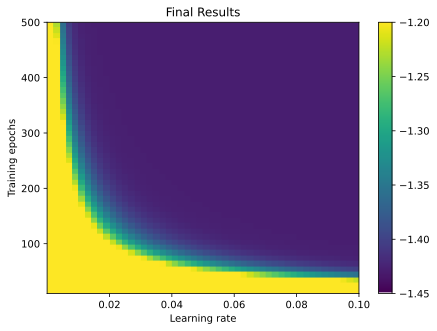

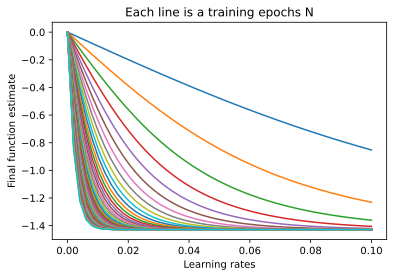

In [17]:
# Experiment  : Systematically vary learning rate AND training epochs

lr = np.linspace(1e-10,1e-1,50) # 50 small values of learning rates
epochs = np.round(np.linspace(10,500,50)) # 40 values of epochs between 10 to 500

results = np.zeros((len(lr), len(epochs))) # we need a matrix to store the values of final results with varying epochs and learning rates

for i, rate in enumerate(lr):
                   
    for j, n in enumerate(epochs):
    
        localmin = 0 #let's say initial point is always at 0

        for _ in range(int(n)):
            grad = derv(localmin)
            localmin = localmin - grad*rate #multiply with each learning rate for 1000 epochs

        results[i,j] = localmin

# plt.plot(lr, finalres)
# plt.plot(epochs, finalres)
# plt.xlabel("Learning rate")
# plt.ylabel("Final values after GD")
# plt.show()

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(results,extent=[lr[0],lr[-1],epochs[0],epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final Results')
plt.colorbar()
plt.show()

# another visualization
plt.plot(lr,results)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

In the image above, each box corresponds to the final local minimum for a value of learning rate and training epoch. Purple == good, and yellow == bad(didn't arrive at local minimum yet). We see that when learning rate AND number of epochs are high, the results are good. We don't get a good result if either of them are too small.

In the second graph, each line represents a trainig epoch value. The line plotting is learning rate vs final guess.

## Vanishing and Exploding Gradients

When in a flatter curve, the gradient at flat surfaces keep getting smaller and smaller, and hence the local minimum update, i.e. the step size, also keeps getting lesser and lesser, and might go infinitely less where the step size becomes zero, and stops. This is happening due to tiny values of gradient, and this problem is called **Vanishing Gradient**. Due to this, we may never get out of the flat area of the curve.


When there are steep changes in the curves, the gradient becomes very huge due to which the step size is also huge and we can completely miss out the local minimum and land somewhere else in the curve. This is called **Exploding gradient** problem. Weights change wildly and we end up with bad solutions.

Some solutions that have come up for these problems are:
- Using models with few hidden layers.
- Using Activation functions that do not saturate.
- Apply Weight Normalization.
- Pre-train networks using Autoencoders.
- Using Regularization techniques like dropout, batch normalization etc.
- Using Architectures such as residual networks (resnet).